# Análisis de Datos - Semana 6 
## María José Fonseca Vázquez

In [1]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import numpy as np
import requests
import os

<ErrorbarContainer object of 3 artists>

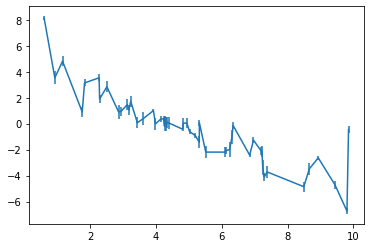

In [2]:
data = np.load('fit_exercise.npy')
plt.errorbar(data[0], data[1], yerr = data[2])

Métido de chi cuadrada par una malla uniforme:

In [3]:
n = 10
x, y, error = data[0], data[1], data[2]
m = np.linspace(-2, 0, n)
b = np.linspace(2, 8, n)

recta = lambda args: args[0]*x + args[1] 
#def recta(m, b):
 #   return m*x + b

#Método chi cuadrada:
def chisq(Theta):
    modelo = recta(Theta) 
    chi = (y - modelo)**2 / error**2
    return chi.sum()

In [18]:
results = []
for m_ in m:
    for b_ in b:
        #print (m_, b_)
        chi_ = chisq([m_, b_])
        vec = [m_, b_, chi_]
        results.append(vec)

#Busco el valor mínimo
min_x = 10000
for res in results:
    if res[2] < min_x:
        min_x = res[2]
        min_ = res
min_

[-1.1111111111111112, 5.333333333333333, 1246.469283469469]

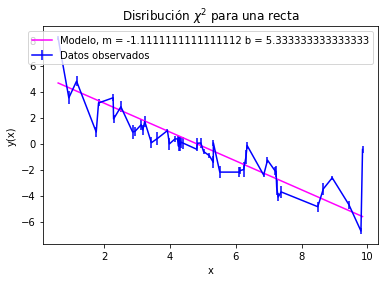

In [19]:
y_m1 = min_[0]*x+min_[1]
lab = 'Modelo, m = ' + str(min_[0]) + ' b = ' + str(min_[1])
plt.errorbar(data[0], data[1], yerr = data[2], color = 'blue', label = 'Datos observados')
#plt.plot(data[0], data[1], color = 'blue', label = 'Datos observados')
plt.plot(data[0], y_m1, color = 'magenta', label = lab)
plt.title('Disribución $\chi^2$ para una recta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

Para una malla aleatoria:

In [52]:
results = []

for i in range(1000):#print (m_, b_)
        m_ = np.random.uniform(-2, 0) 
        b_ = np.random.uniform(2, 8)
        chi_ = chisq([m_, b_])
        vec = [m_, b_, chi_]
        results.append(vec)

min_x = 1000000000
for res in results:
    if res[2] < min_x:
        min_x = res[2]
        min_ = res
min_

[-1.101414078767254, 5.4456846752161825, 1231.396828580542]

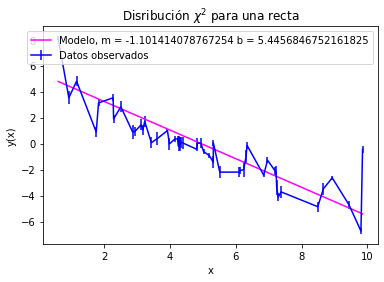

In [53]:
y_m2 = min_[0]*x+min_[1]
lab = 'Modelo, m = ' + str(min_[0]) + ' b = ' + str(min_[1])
plt.errorbar(data[0], data[1], yerr = data[2], color = 'blue', label = 'Datos observados')
#plt.plot(data[0], data[1], color = 'blue', label = 'Datos observados')
plt.plot(data[0], y_m2, color = 'magenta', label = lab)
plt.title('Disribución $\chi^2$ para una recta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

Con Optimize:

In [20]:
x0 = [0, 7]
res = minimize(chisq, x0)

m_ = res.x[0]
b_ = res.x[1]

m_, b_

(-1.1040757264975551, 5.44055535360655)

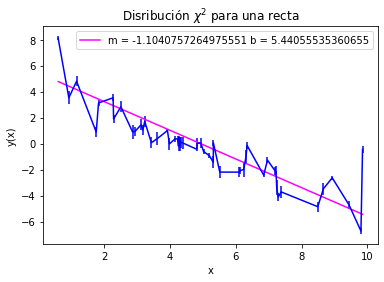

In [21]:
y_m3 = m_*x + b_
plt.errorbar(data[0], data[1], yerr = data[2], color = 'blue')
#plt.plot(data[0], data[1], color = 'blue', label = 'Datos observados')
plt.plot(data[0], y_m3, color = 'magenta', label = 'm = ' + str(m_) + ' b = ' + str(b_))
plt.title('Disribución $\chi^2$ para una recta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

Comparaciones:

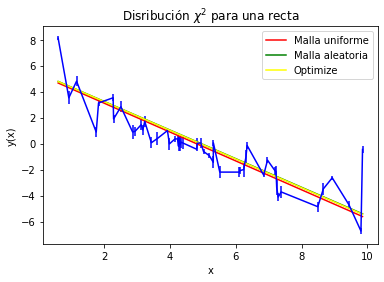

In [54]:
plt.errorbar(data[0], data[1], yerr = data[2], color = 'blue')
#plt.plot(data[0], data[1], color = 'blue', label = 'Datos observados')
plt.plot(data[0], y_m1, color = 'red', label = 'Malla uniforme')
plt.plot(data[0], y_m2, color = 'green', label = 'Malla aleatoria')
plt.plot(data[0], y_m3, color = 'yellow', label = 'Optimize')
plt.title('Disribución $\chi^2$ para una recta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

Histogramas:

Text(0, 0.5, 'Frecuencia')

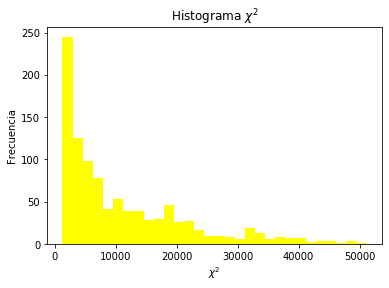

In [62]:
vec_x = []
#plt.figure(figsize = [10, 8])
for res in results:
    vec_x.append(res[2]) 
plt.hist(vec_x, bins = 30, color = 'yellow')
plt.title('Histograma $\chi^2$')
plt.xlabel('$\chi^2$')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

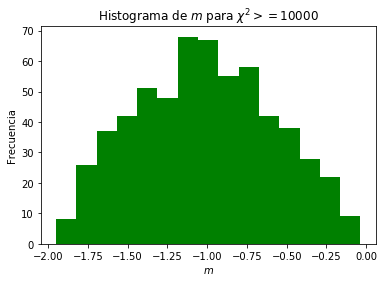

In [63]:
vec_m = []
#plt.figure(figsize = [10, 8])
for res in results:
    if res[2] <= 10000:
        vec_m.append(res[0]) 
plt.hist(vec_m, bins = 15, color = 'green')
plt.title('Histograma de $m$ para $\chi^2 >= 10000$')
plt.xlabel('$m$')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

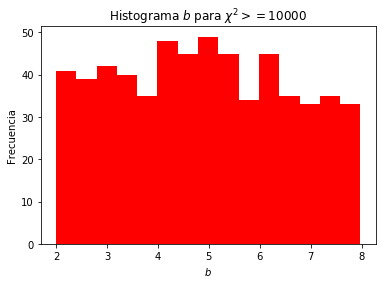

In [64]:
vec_b = []
#plt.figure(figsize = [10, 8])
for res in results:
    if res[2] <= 10000:
        vec_b.append(res[1]) 
plt.hist(vec_b, bins = 15, color = 'red')
plt.title('Histograma $b$ para $\chi^2 >= 10000$')
plt.xlabel('$b$')
plt.ylabel('Frecuencia')